## Primi 100 comuni per superficie

[    Pos.     Comune         Regione        Provincia Superficie (km²)
0      1       Roma           Lazio             Roma         1 287,24
1      2    Ravenna  Emilia-Romagna          Ravenna            65381
2      3  Cerignola          Puglia           Foggia            59392
3      4       Noto         Sicilia         Siracusa            55498
4      5    Sassari        Sardegna          Sassari            54703
..   ...        ...             ...              ...              ...
95    96    Dorgali        Sardegna            Nuoro            22653
96    97     Urbino          Marche  Pesaro e Urbino            22649
97    98      Cagli          Marche  Pesaro e Urbino            22646
98    99     Ostuni          Puglia         Brindisi            22556
99   100    Alghero        Sardegna          Sassari            22541

[100 rows x 5 columns]]
   Pos.   Comune         Regione Provincia Superficie
0     1     Roma           Lazio      Roma   1 287,24
1     2  Ravenna  Emilia-R

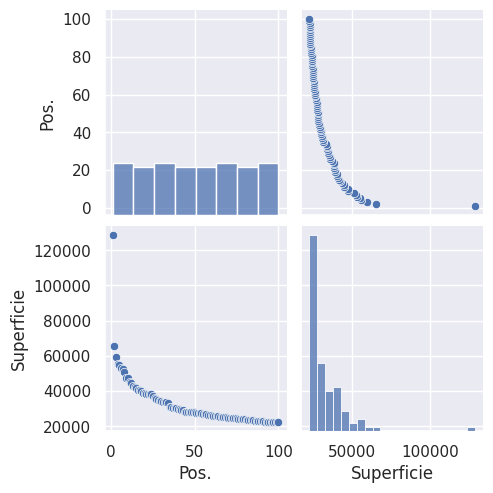

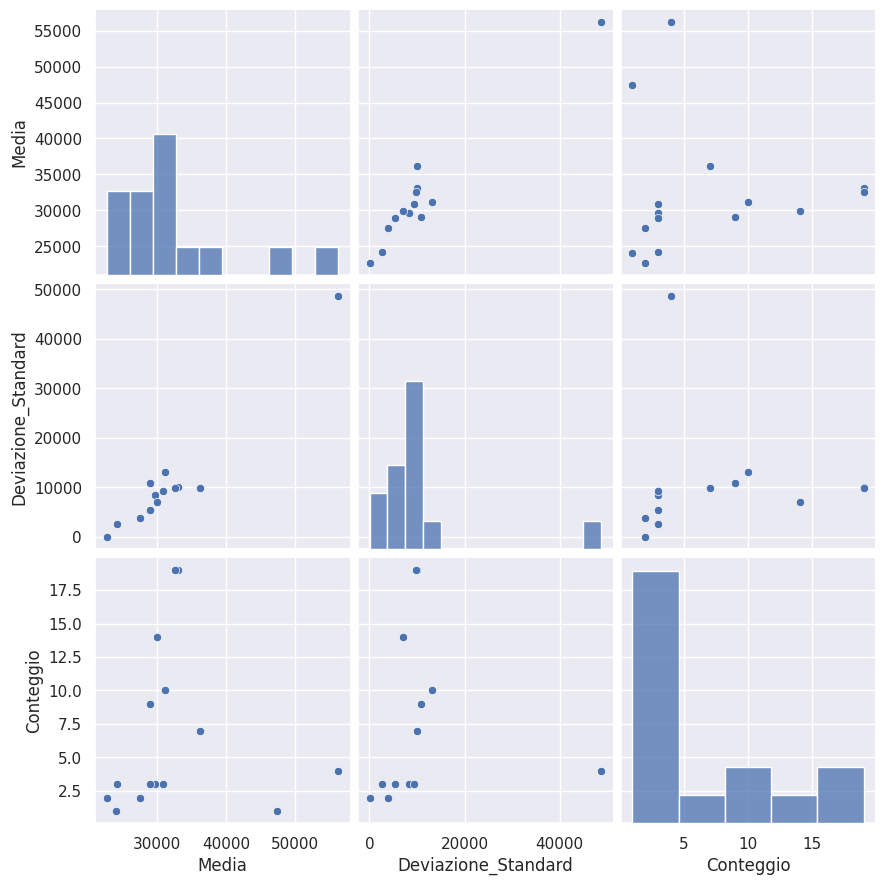

In [1]:
import pandas as pd

# !pip install jupyter-summarytools -q
from summarytools import dfSummary

import seaborn as sns

import matplotlib.pyplot as plt
#%matplotlib inline

preview_window=2
url_superficie = "https://it.wikipedia.org/wiki/Primi_100_comuni_italiani_per_superficie"
comuni_superficie = pd.read_html(url_superficie, attrs={"class":"wikitable"}, header=0)

print(comuni_superficie)
comuni_superficie = comuni_superficie[0]
comuni_superficie = comuni_superficie.rename(columns={'Superficie (km²)': 'Superficie'})
print(comuni_superficie.head(preview_window))

print("\n\n")
print("Preprocess ------------------------")
print("Controllo rimpiazzo spazi e virgole")
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].str.replace(' ', '').str.replace(',', '.')
comuni_superficie['Superficie'] = comuni_superficie['Superficie'].str.replace(',' , '').str.replace(r'\s', '', regex=True)
print(comuni_superficie.head(preview_window))

print("")
print("Converto superficie numerica")
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].astype(float)
#comuni_superficie = pd.to_numeric(comuni_superficie['Superficie Rate']) 
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].astype(dtype = float, errors = 'coerce')
comuni_superficie['Superficie'] = pd.to_numeric(comuni_superficie['Superficie'], errors = 'coerce')
print(comuni_superficie.head(preview_window)) # coerce transform not numeric in NaN

print("")
print("Rimuovo NaN")
comuni_superficie.dropna()
print(comuni_superficie.info())
print(comuni_superficie.head(preview_window))

print("\n\n")
print("Raggruppamento ------------------------")

print("Media superficie per regione NaN")
media_sup_per_regione = comuni_superficie.groupby('Regione', as_index=False)['Superficie'].mean()
#comuni_superficie.groupby('Regione').mean()
media_sup_per_regione = media_sup_per_regione.rename(columns={'Superficie': 'Superficie media comuni'})
print(media_sup_per_regione)

print("")
print("Varie statistiche per regione")
#reg = comuni_superficie.groupby('Regione')
#reg.aggregate([np.mean, np.std, pd.Series.count])
reg = comuni_superficie.groupby('Regione')['Superficie'].agg(
    Media='mean',       # Calcola la media
    Deviazione_Standard='std',  # Calcola la deviazione standard
    Conteggio='count'   # Calcola il conteggio
)
print(reg)

print("")
print("Solo conteggio")
print(comuni_superficie.groupby('Regione')['Superficie'].count())

print("")
print("Conteggio e riordino")
print(comuni_superficie.groupby('Regione')['Superficie'].count().sort_values(ascending=False))


print("\n\n")
print("Seaborn plot ------------------------")
dfSummary(comuni_superficie)
sns.set(color_codes=True)
sns.pairplot(comuni_superficie);
#https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot
plt.show()


sns.pairplot(reg, height=3, aspect=1);
plt.show()

In [2]:
print("\n\n")
print("Sommario ------------------------")
dfSummary(comuni_superficie)




Sommario ------------------------


# EDA

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/EDA2.jpg" width=800 >

## Iris dataset

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png" width=800 >

In [3]:
#from IPython.display import Image
#Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/EDA.jpg',width=600,height=600)
#Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png',width=900,height=300)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from summarytools import dfSummary
import seaborn as sns
sns.set(color_codes=True)

#%matplotlib inline
preview_window=2
dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'


df = pd.read_csv(dataset_path, header=None)


print("\n\n")
print("Preview dataset ------------------------")
print(df.head(preview_window))


print("\n\n")
print("Column header ------------------------")
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
print(df.head(preview_window))


print("\n\n")
print("Test NaN ------------------------")
print(df.info())

print("\n\n")
print("Test Stat ------------------------")
print(df.describe())

print("\n\n")
print("Count class balanced dataset ------------------------")
print(df.groupby('class').count())

print("\n\n")
print("Count class balanced dataset ------------------------")
print(df.groupby('class').count())

print("\n\n")
print("Sommario ------------------------")
dfSummary(df)




Preview dataset ------------------------
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa



Column header ------------------------
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa



Test NaN ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None



Test Stat ------------------------
       sepal length  sepal width  petal length  petal width
count




pandas plot ------------------------
histogram


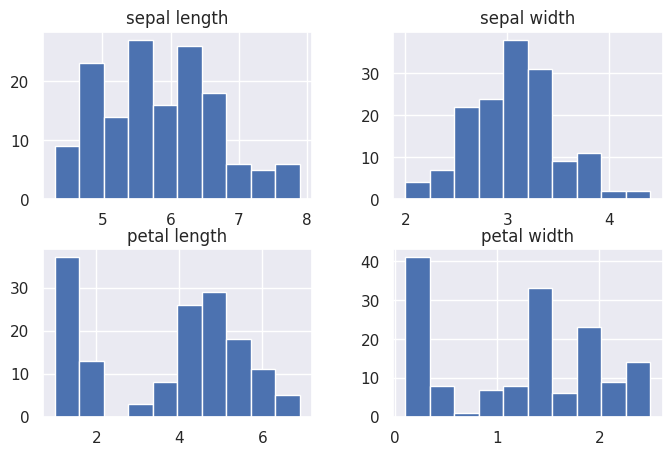


scatter matrix


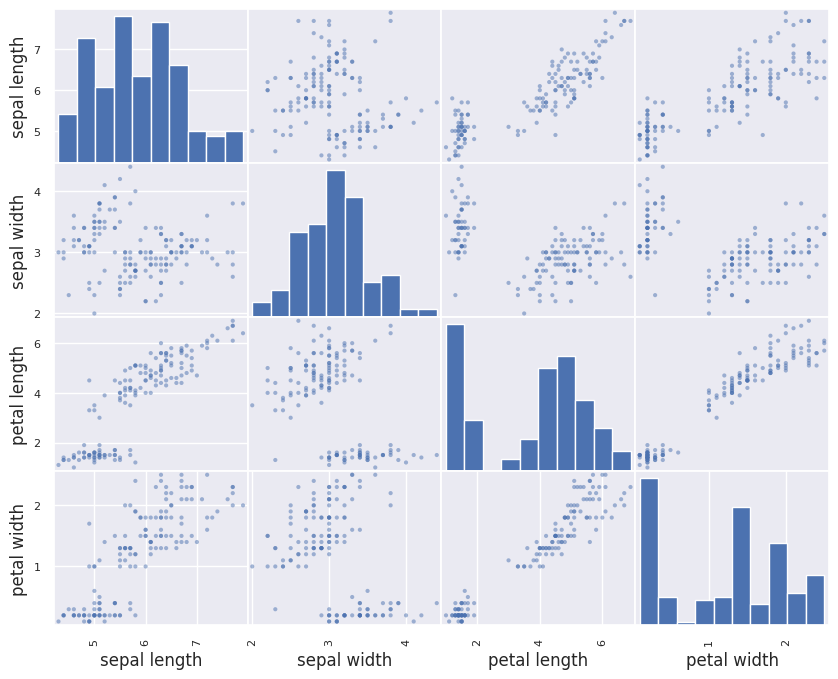


boxplot point are outlier 3 sigma


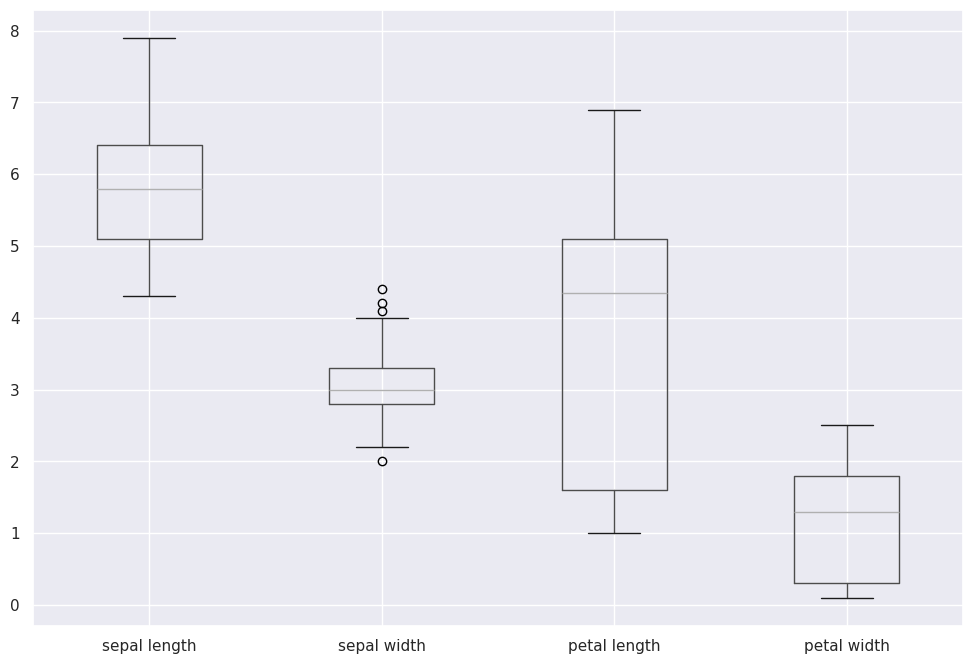


boxplot by class


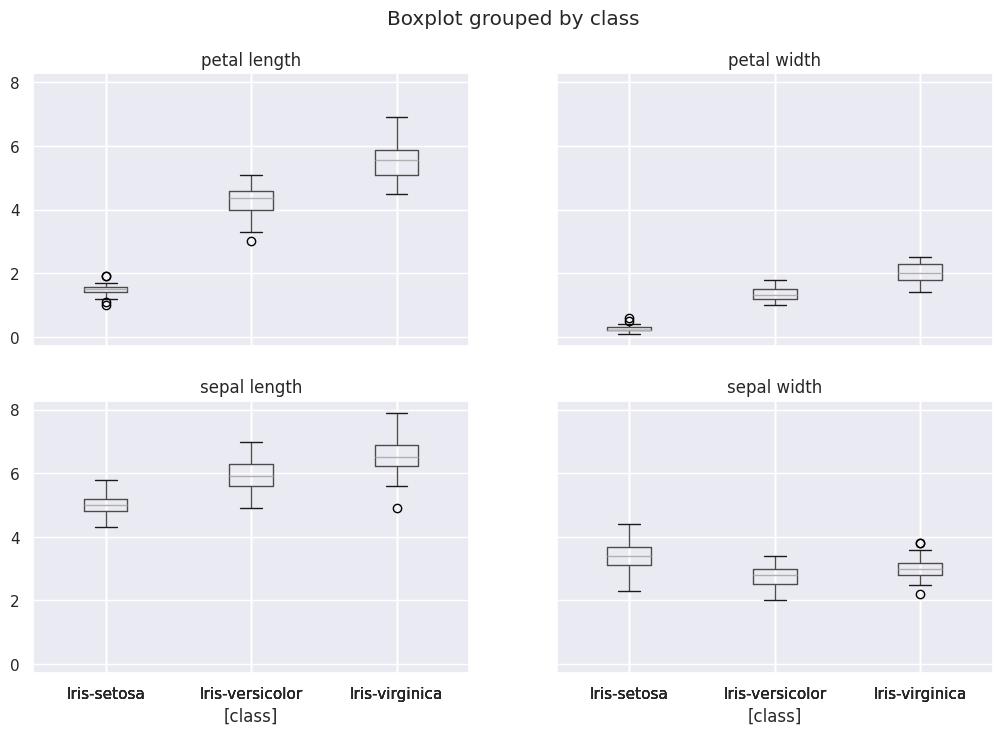


Count sepal width by class


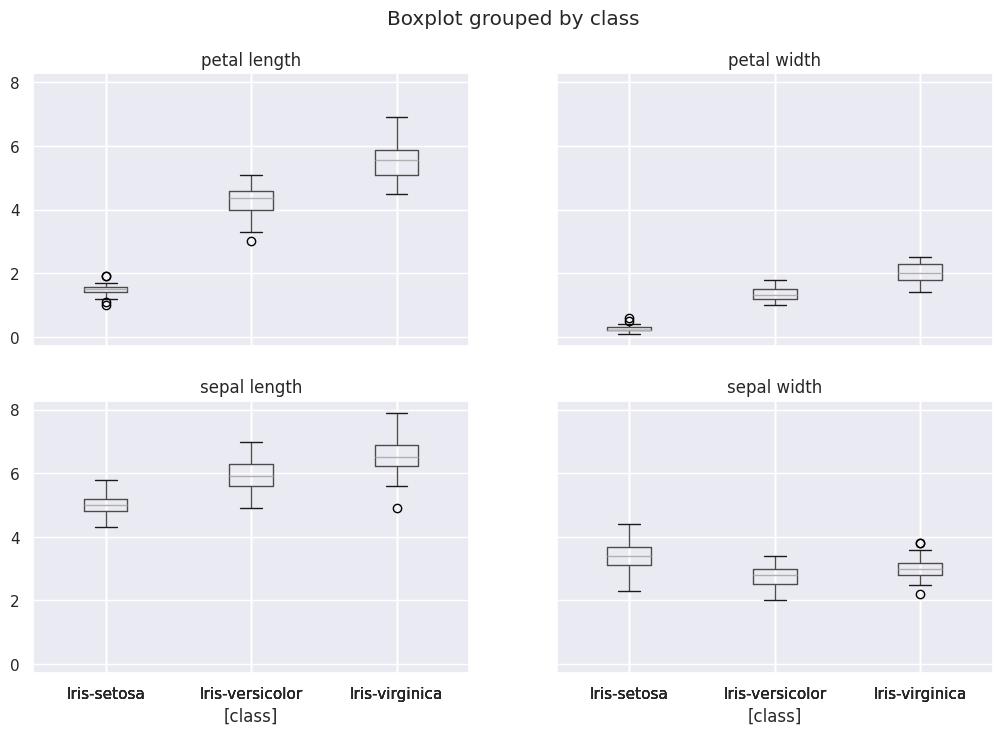


parallel_coordinates Grid search parametri


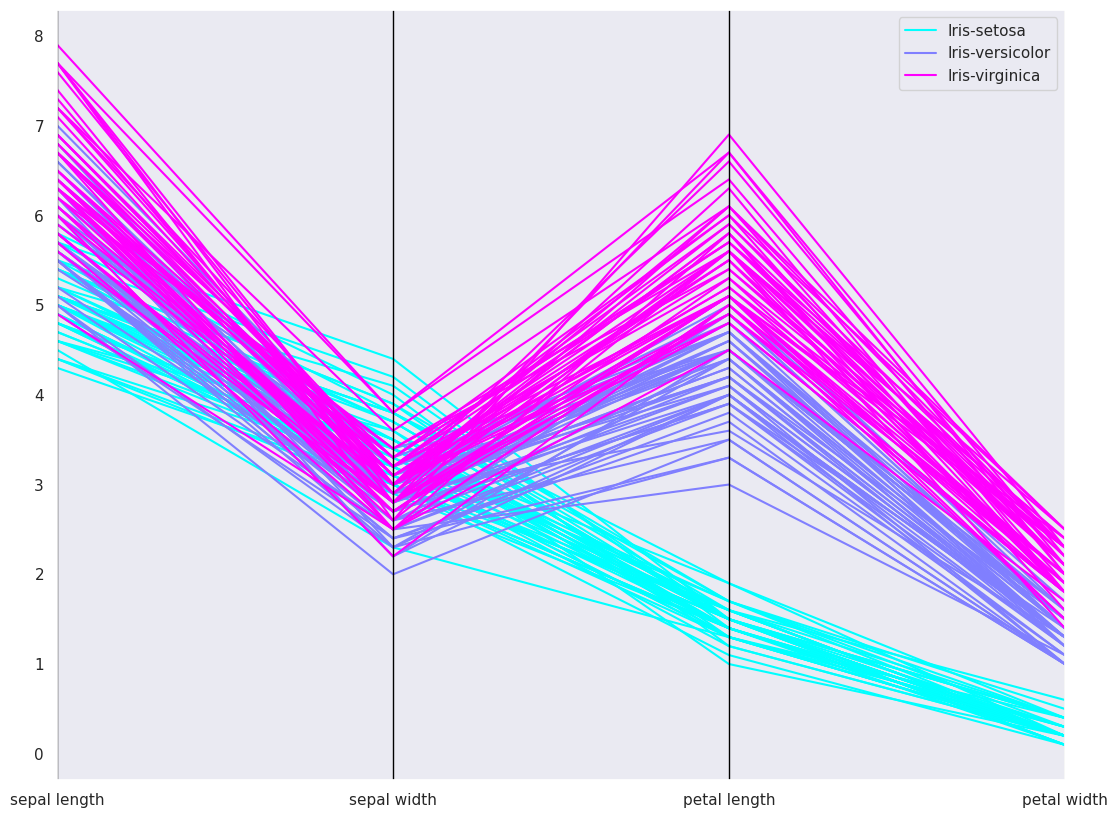




Seaborn plot ------------------------


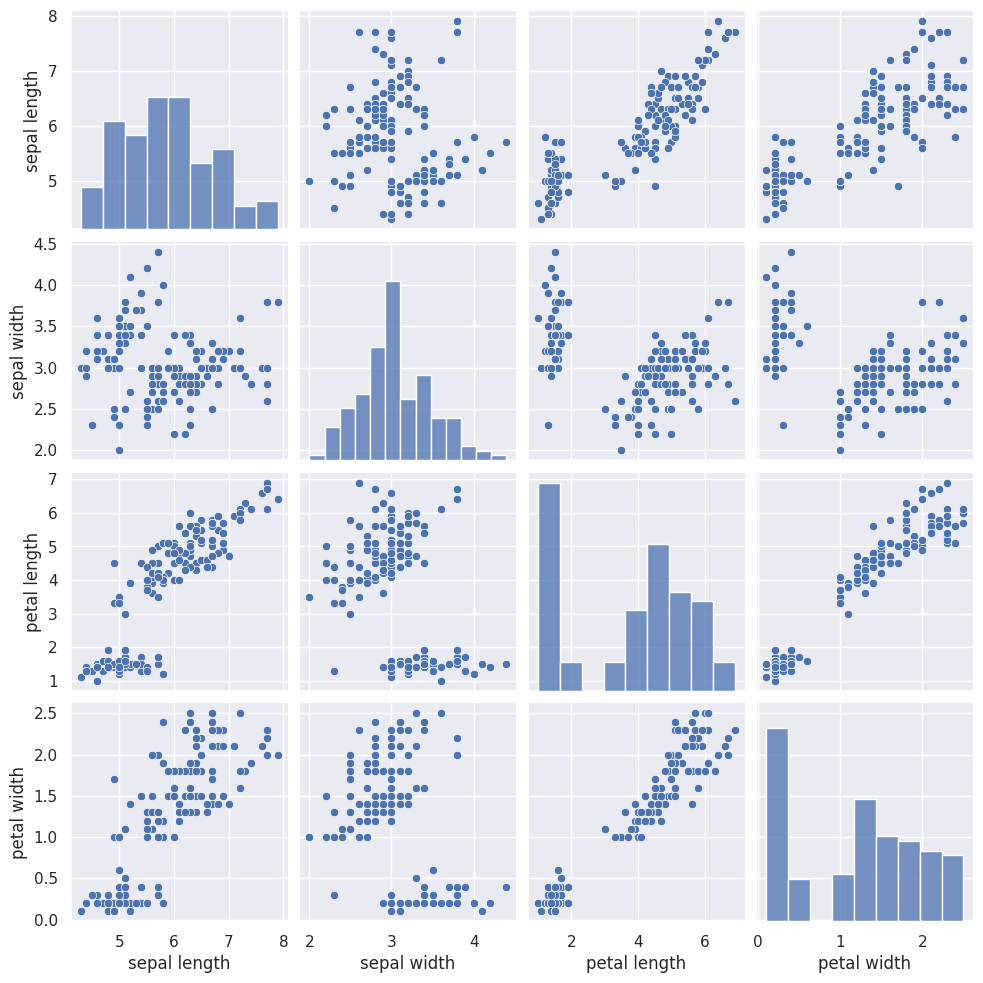


class colorcode


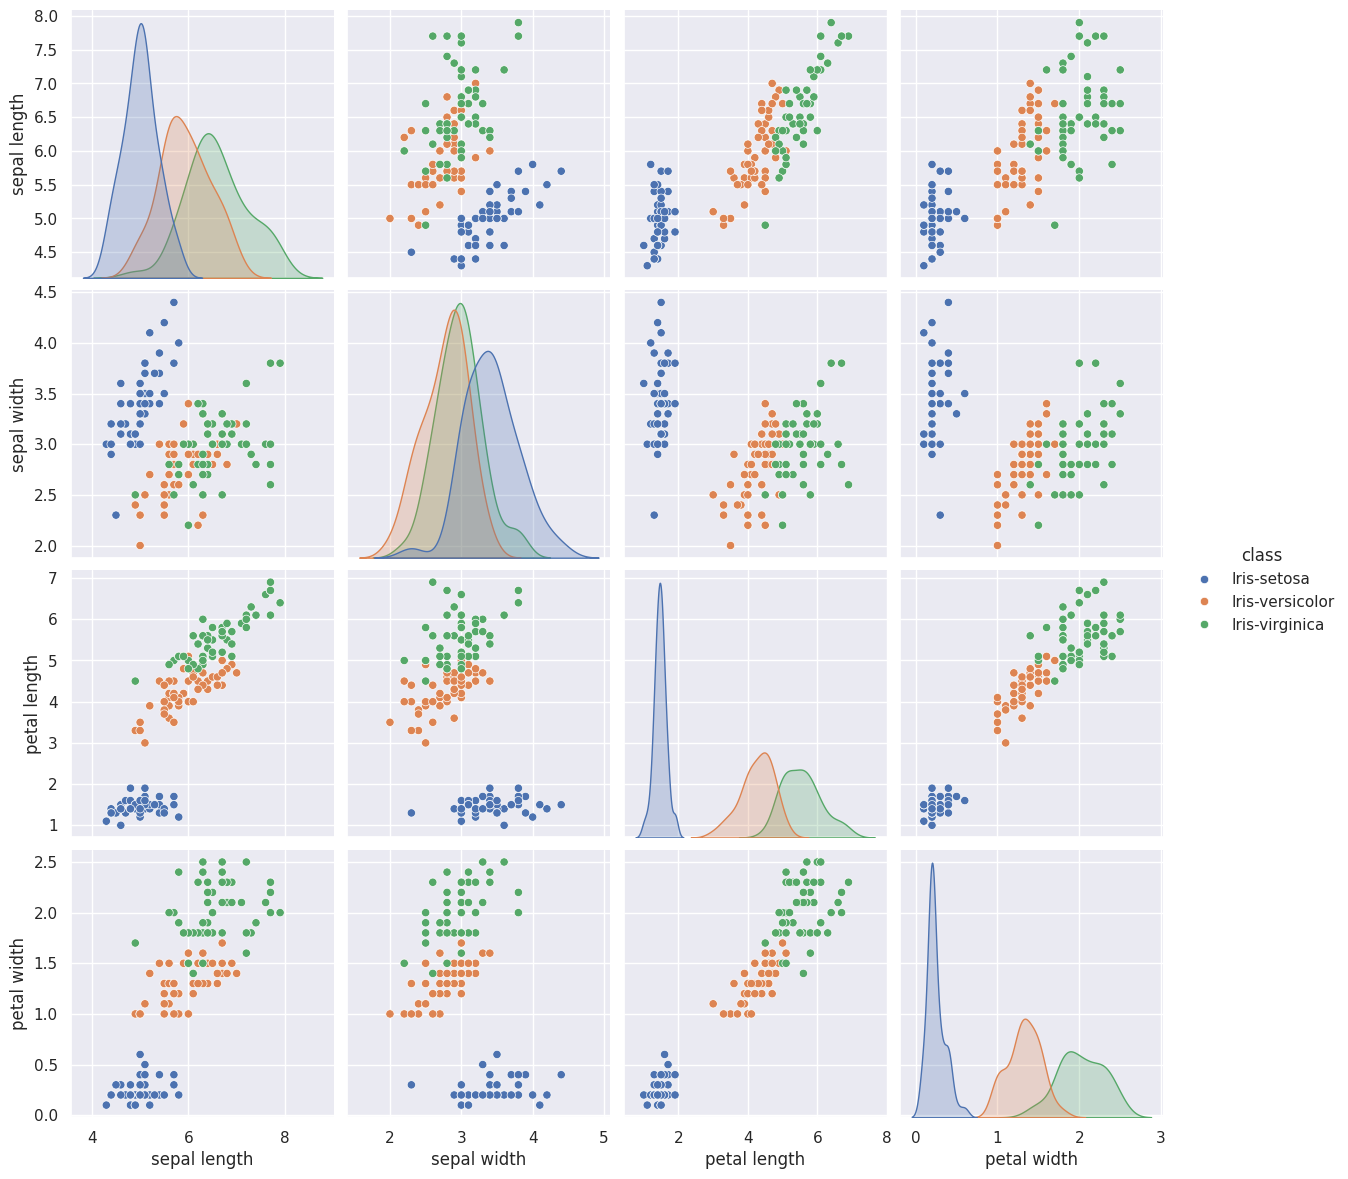


4 violinplot by class


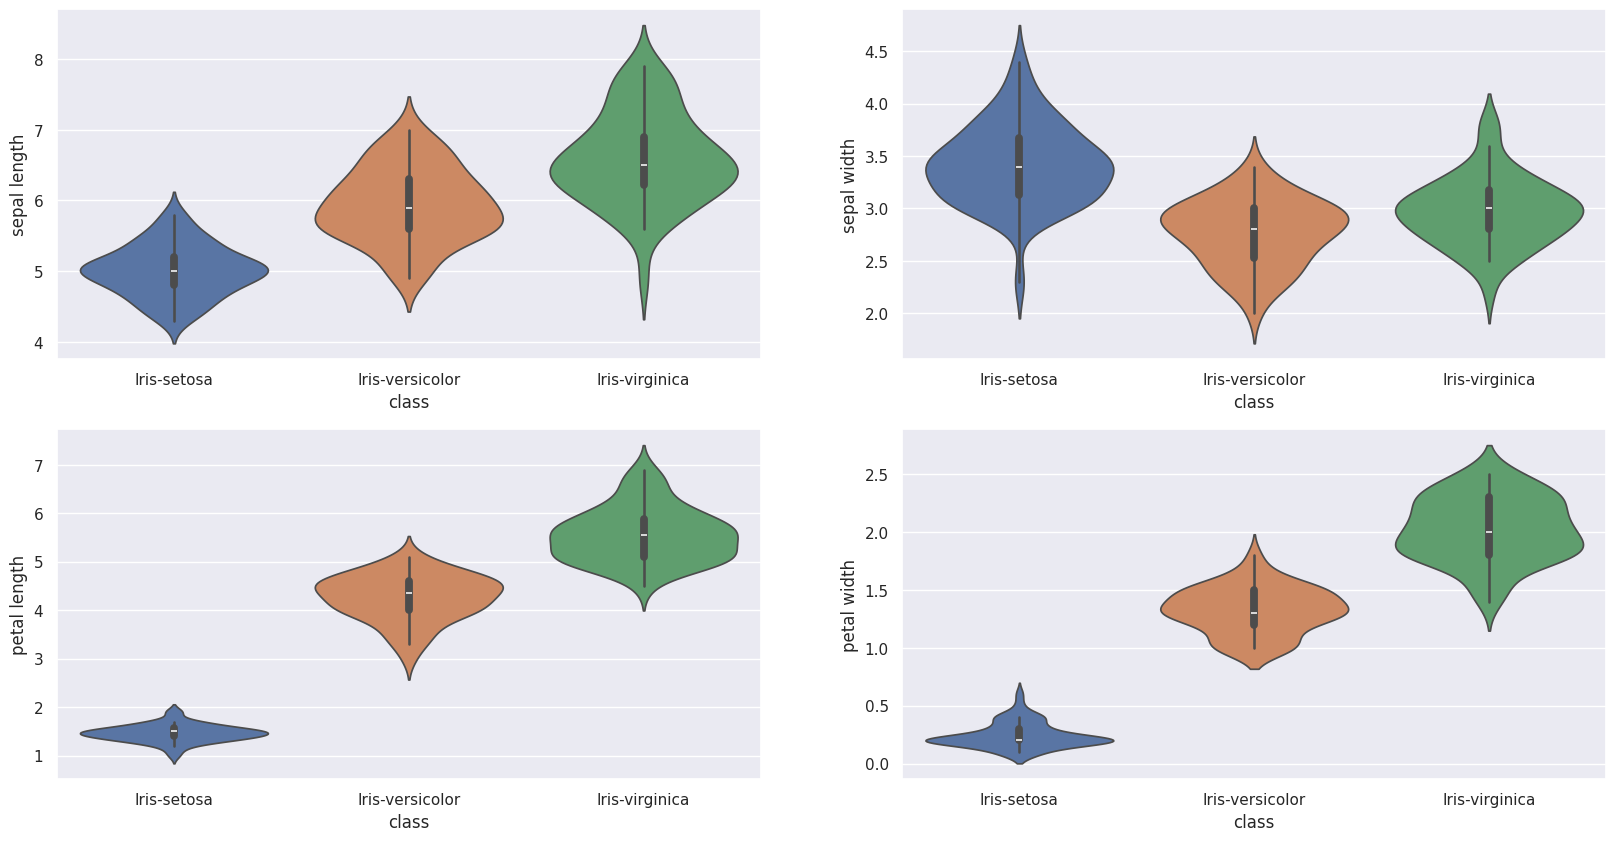


Class count istogram by sepal width


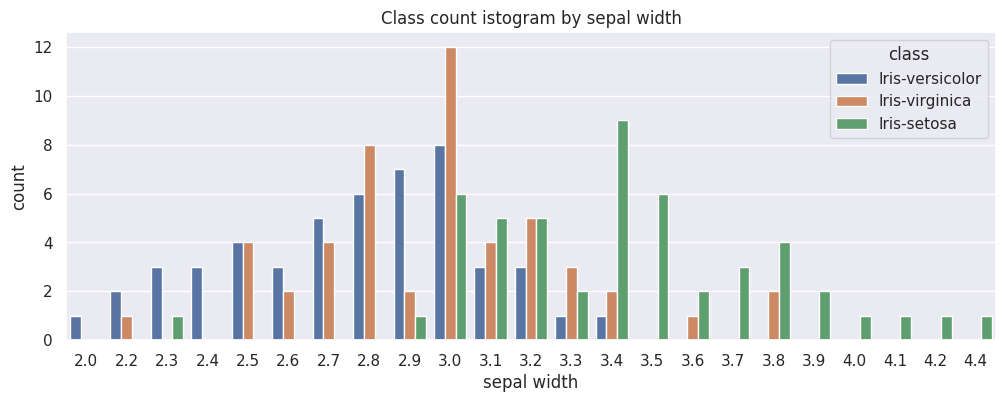


Tagged clustered by class


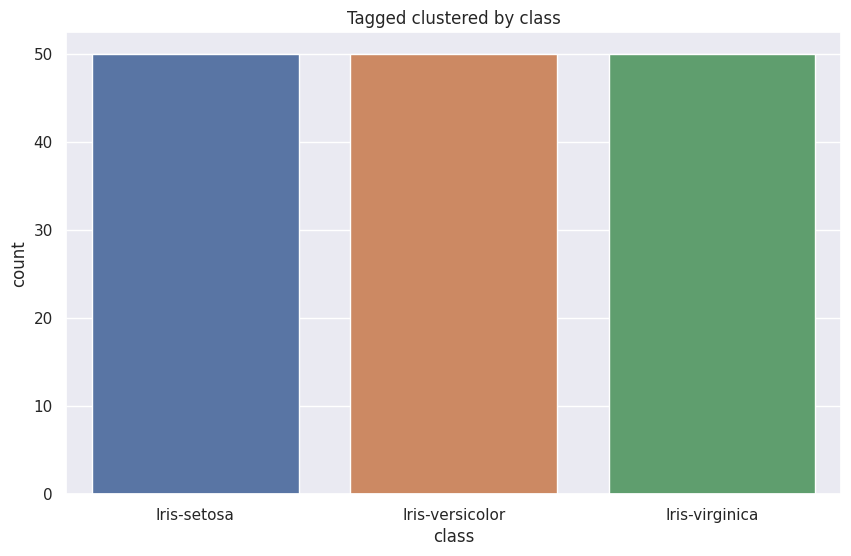


jointplot sepal length |  sepal width


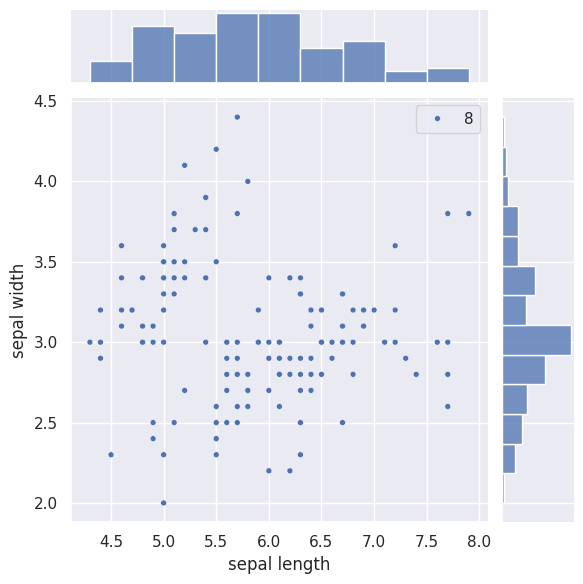


jointplot petal length |  petal width


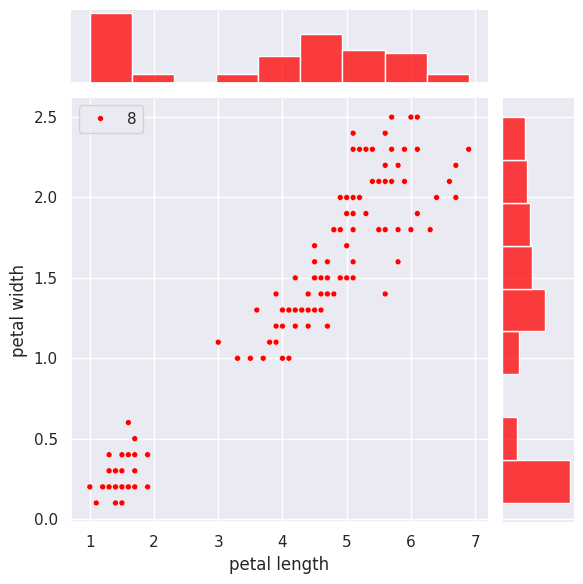


jointplot petal length |  petal width with class colorcode


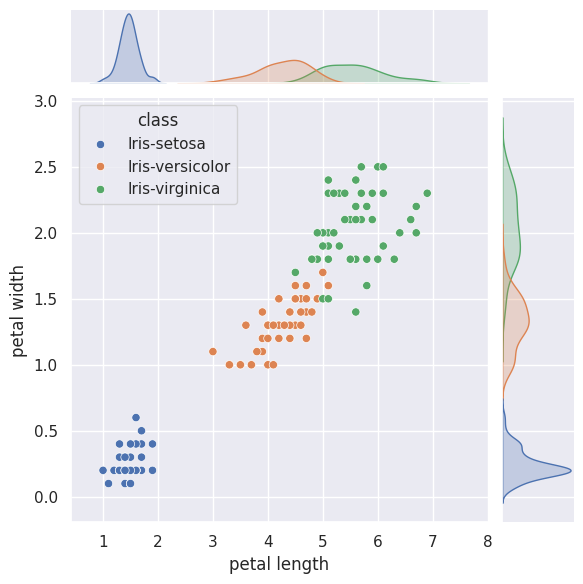


jointplot sepal length |  sepal width with class colorcode


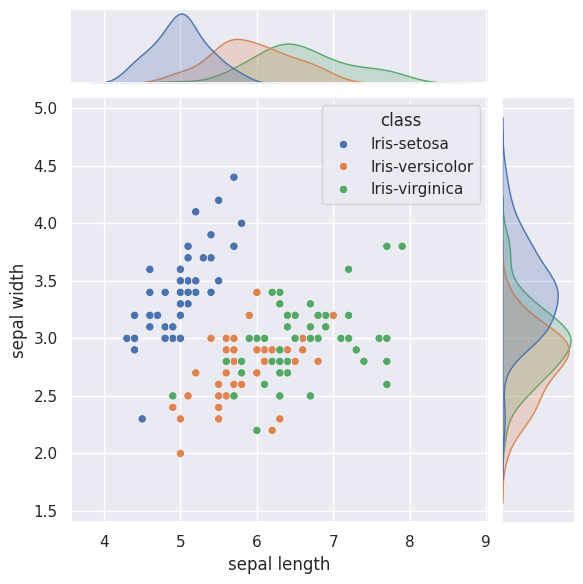


jointplot petal length |  petal width with class colorcode false fit


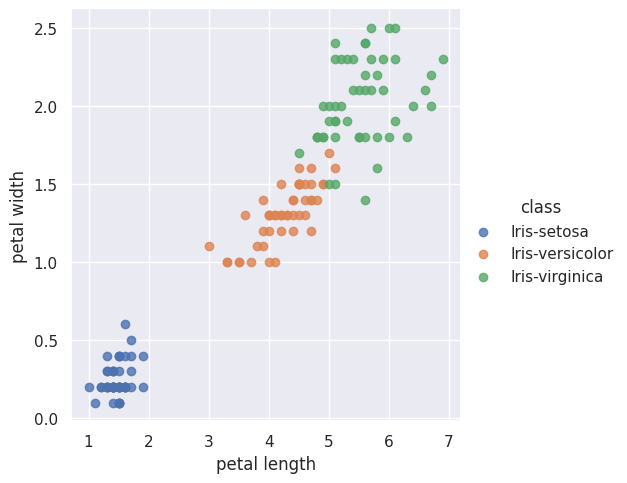


boxplot class | petal length  with class colorcode


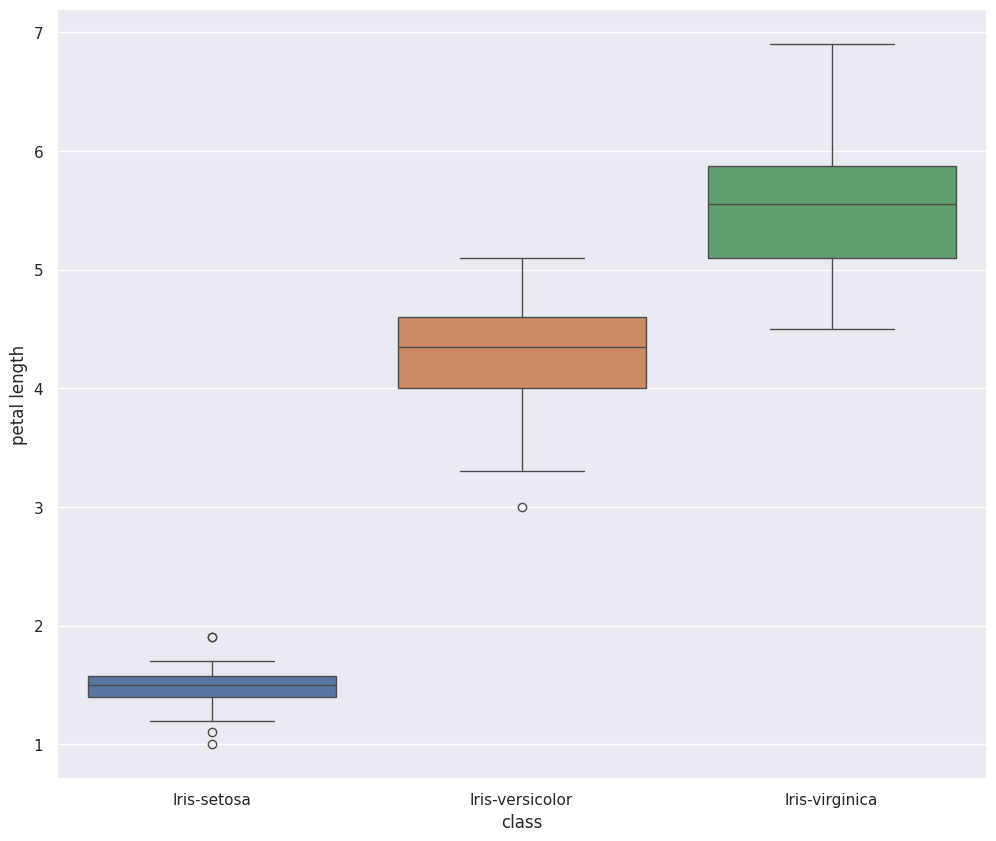


boxplot and stripplot class | petal length  with class colorcode


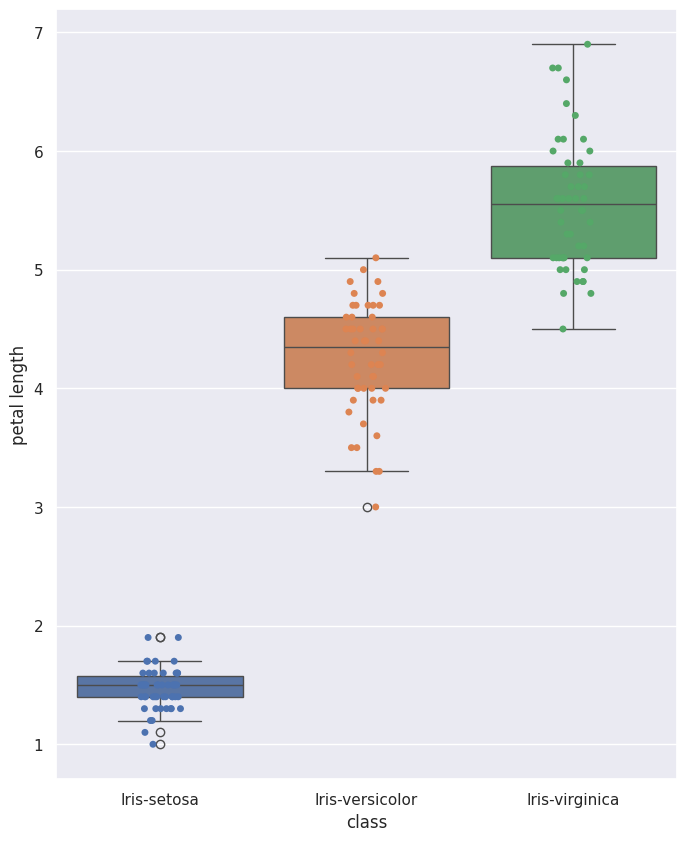


violinplot class | petal length  with class colorcode


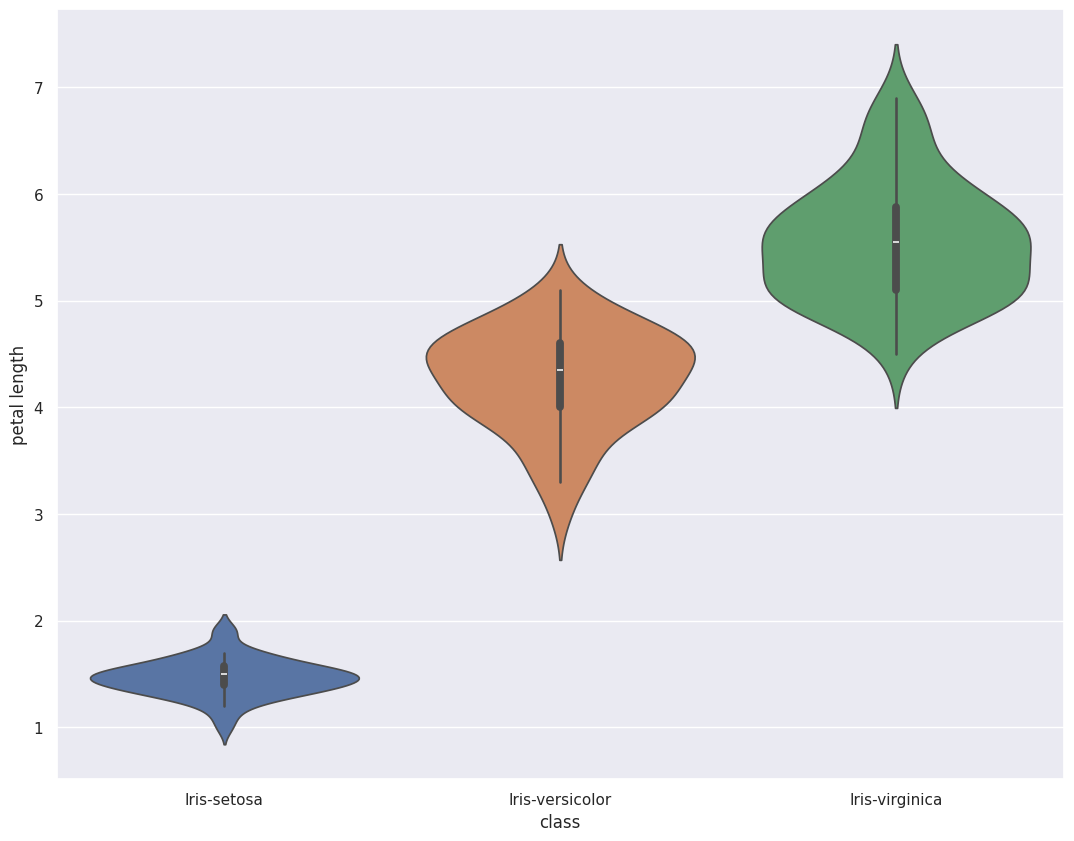


violinplot class | petal length  with palette colorcode by class


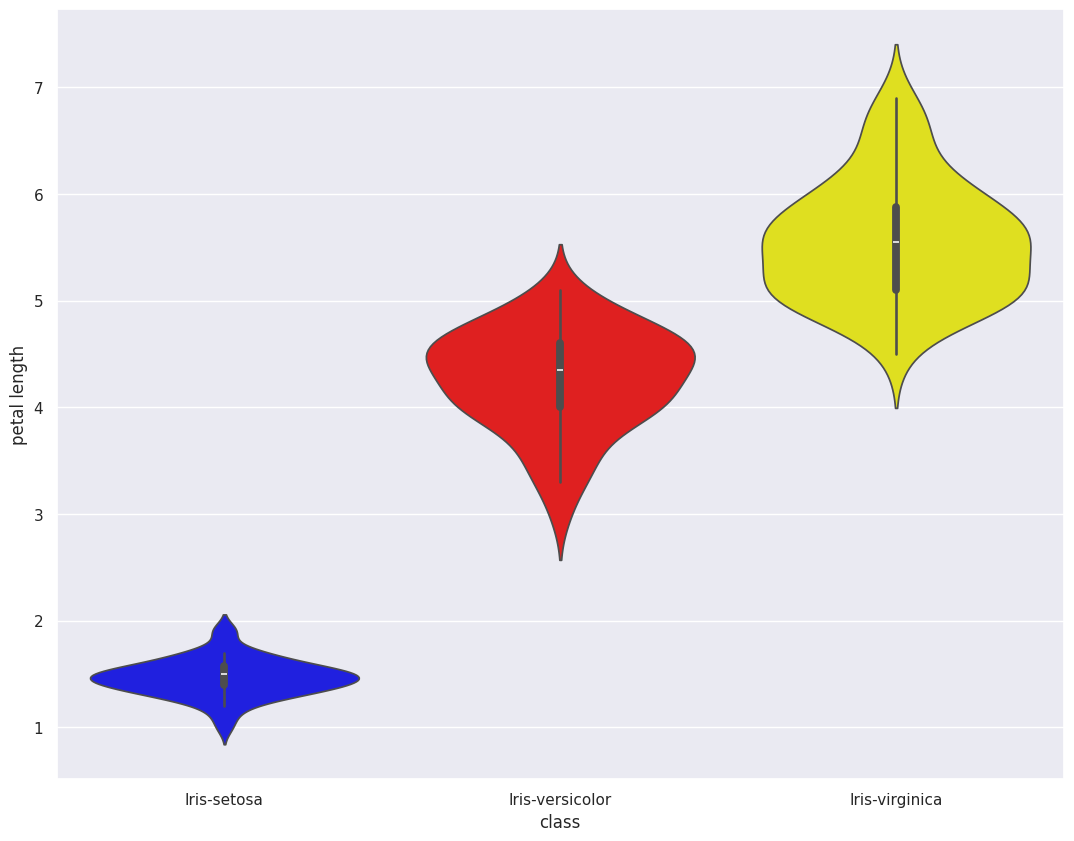


jointplot sepal lenght | width with class colorcode exagon


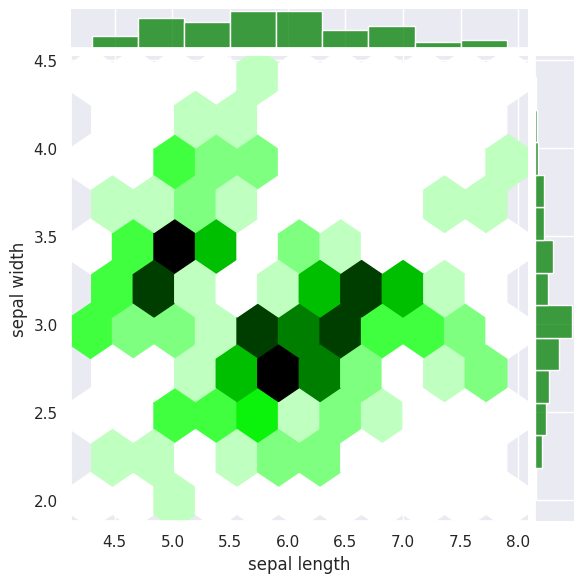


FacetGrid class density petal length


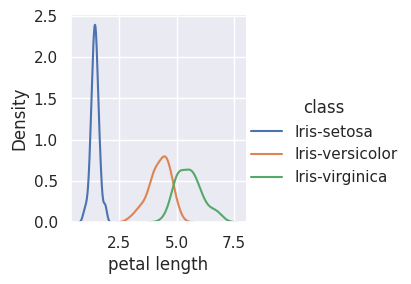

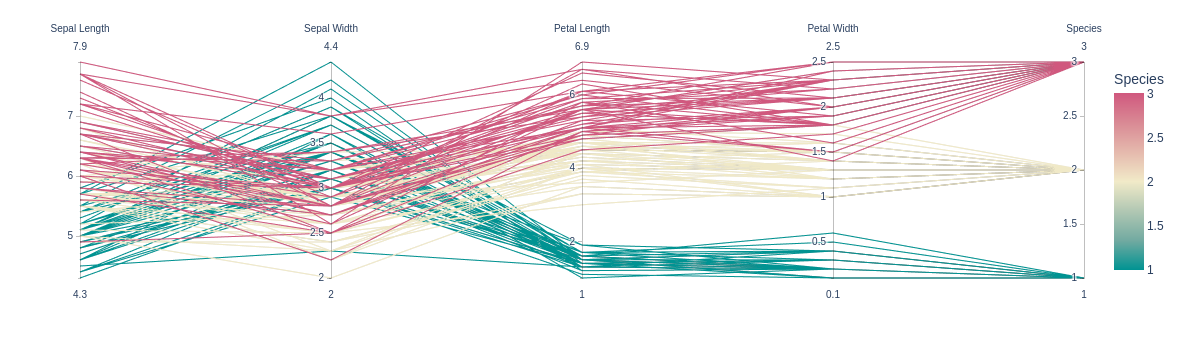

In [5]:



print("\n\n")
print("pandas plot ------------------------")
print("histogram")
df.hist(figsize=(8,5));
plt.show()

print("")
print("scatter matrix")
pd.plotting.scatter_matrix(df, figsize=(10,8));
plt.show()


print("")
print("boxplot point are outlier 3 sigma")
df.boxplot(figsize=(12,8));
plt.show()

print("")
print("boxplot by class")
df.boxplot(by='class', figsize=(12,8));
plt.show()

print("")
print("Count sepal width by class")
df.boxplot(by='class', figsize=(12,8));
plt.show()


# from pandas.plotting import parallel_coordinates
print("")
print("parallel_coordinates Grid search parametri")
plt.figure(figsize=(13,10));
pd.plotting.parallel_coordinates(df, "class",colormap='cool');
plt.show()


#print(help(sns.pairplot))

print("\n\n")
print("Seaborn plot ------------------------")
sns.set(color_codes=True)
sns.pairplot(df);
plt.show()

print("")
print("class colorcode")
sns.pairplot(df, hue='class', height=3, aspect=1);
plt.show()

print("")
print("4 violinplot by class")
plt.figure(figsize=(20,10));
# subplot su matrice 2x2
plt.subplot(2,2,1)
sns.violinplot(x='class', y='sepal length',data=df,hue="class")
plt.subplot(2,2,2)
sns.violinplot(x='class', y='sepal width', data=df,hue="class")
plt.subplot(2,2,3)
sns.violinplot(x='class', y='petal length', data=df,hue="class")
plt.subplot(2,2,4)
sns.violinplot(x='class', y='petal width', data=df,hue="class");
plt.show()

print("")
print("Class count istogram by sepal width")
plt.figure(figsize=(12, 4))
plt.title('Class count istogram by sepal width')
plt.legend('class')
sns.countplot(x='sepal width',data=df,hue='class');
plt.show()


print("")
print("Tagged clustered by class")
plt.figure(figsize=(10, 6))
plt.title('Tagged clustered by class')
sns.countplot(x='class', hue="class", data=df);
plt.show()


print("")
print("jointplot sepal length |  sepal width")
sns.jointplot(x="sepal length", y="sepal width", data=df, size=8);
plt.show()


print("")
print("jointplot petal length |  petal width")
sns.jointplot(x="petal length", y="petal width", data=df, size=8, color='red');
plt.show()


print("")
print("jointplot petal length |  petal width with class colorcode" )
sns.jointplot(x='petal length',y='petal width',hue='class',data=df)
plt.show()


print("")
print("jointplot sepal length |  sepal width with class colorcode" )
sns.jointplot(x="sepal length", y="sepal width",hue='class',data=df);
plt.show()

print("")
print("jointplot petal length |  petal width with class colorcode false fit" )
sns.lmplot(x="petal length", y="petal width",hue='class', data=df, fit_reg=False);
plt.show()


print("")
print("boxplot class | petal length  with class colorcode" )
plt.figure(figsize=(12,10))
sns.boxplot(x="class", y="petal length", data=df,hue='class');
plt.show()


print("")
print("boxplot and stripplot class | petal length  with class colorcode" )
plt.figure(figsize=(8,10));
sns.boxplot(x="class", y="petal length", data=df,hue='class');
sns.stripplot(x="class", y="petal length", data=df,hue='class');
plt.show()


print("")
print("violinplot class | petal length  with class colorcode" )
plt.figure(figsize=(13,10));
sns.violinplot(x="class", y="petal length", data=df,hue='class');
plt.show()


print("")
print("violinplot class | petal length  with palette colorcode by class" ) #palette
plt.figure(figsize=(13,10));
sns.violinplot(x="class", y="petal length",  palette={"blue","red","yellow"}, data=df , hue='class');
plt.show()



print("")
print("jointplot sepal lenght | width with class colorcode exagon" )
sns.jointplot(x="sepal length", y="sepal width", data=df,ratio=10, kind='hex',color='green');
plt.show()


print("")
print("FacetGrid class density petal length" )
sns.FacetGrid(df, hue="class").map(sns.kdeplot, "petal length").add_legend();
plt.show()


import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [6]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

# try semi supervised clustering 

Conteggio elementi per cluster:
 {1: 50, 2: 50, 3: 50}


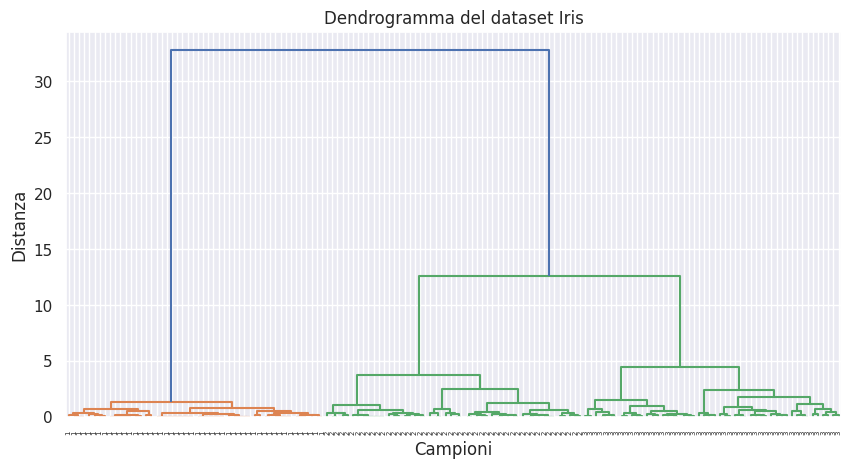

In [7]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


df = df.drop('species',axis=1) # untag

X = df.drop('sepal_width',axis=1).drop('sepal_length',axis=1).values # distance matrix with other dimension give {1: 50, 2: 36, 3: 64}
Z = sch.linkage(X, method='ward')

max_d = 10
clusters = sch.fcluster(Z, max_d, criterion='distance')

unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Conteggio elementi per cluster:\n", cluster_counts)

plt.figure(figsize=(10, 5))
sch.dendrogram(Z, labels=clusters)
plt.title("Dendrogramma del dataset Iris")
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.show()

# Datasaurus Dozen: All have same low order summary statistics

There's a reason why data scientists spend so much time exploring data using graphics. Relying only on data summaries like means, variances, and correlations can be dangerous, because wildly different data sets can give similar results.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/DataSaurusDozen.gif" width=1200 >

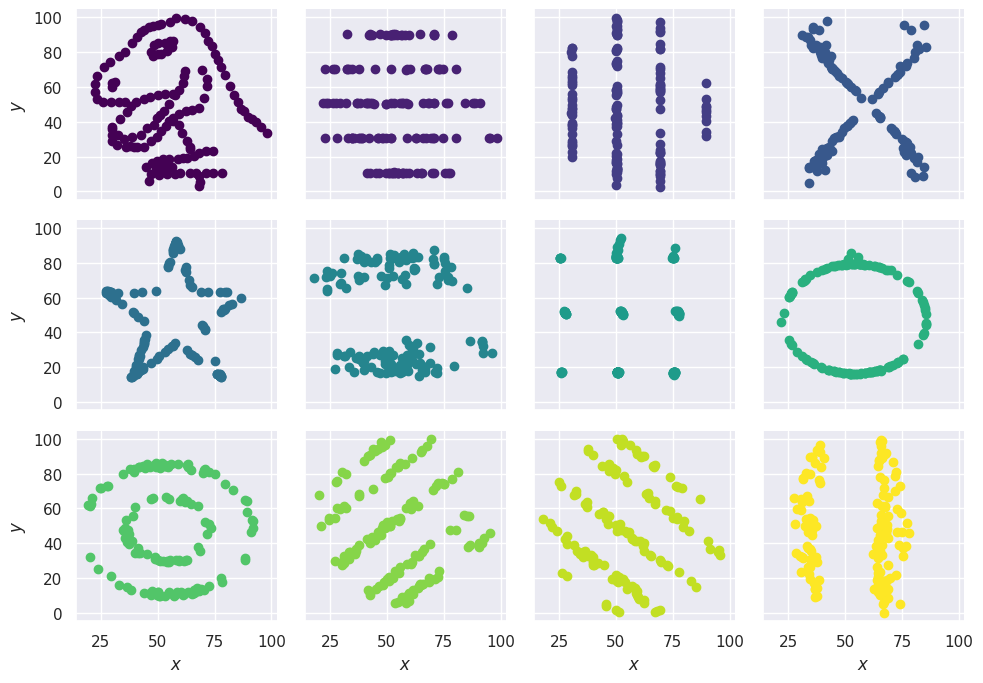

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



url = "https://raw.githubusercontent.com/probml/probml-data/main/data/DatasaurusDozen.tsv"
df = pd.read_csv(url, sep="\t")

dataset_names = ["dino","h_lines","v_lines","x_shape","star","high_lines","dots",
                 "circle","bullseye","slant_up","slant_down","wide_lines",]

fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10, 7))

axs = []
for row in axes:
    for ax in row:
        axs.append(ax)

#color_map = plt.cm.get_cmap(lut=12) # deprecated
color_map = plt.get_cmap('viridis').resampled(12)
color_map = plt.colormaps['viridis'].resampled(12)

for i, name in enumerate(dataset_names):
    #print(name)
    name_index = df["dataset"] == name
    data_df = df[name_index]
    data_df = data_df.sort_values(by="x")
    x = data_df["x"].values.reshape(-1, 1)
    y = data_df["y"].values.reshape(-1, 1)

    data = {"x": x, "y": y, "name": name}

    ax = axs[i]

    # Replace the following line with your own plotting logic
    ax.scatter(data["x"], data["y"], label=name, color=color_map(i))

    if i >= 8:
        ax.set_xlabel("$x$")
    if i % 4 == 0:
        ax.set_ylabel("$y$")

    mean_x = data_df["x"].to_numpy().mean()
    mean_y = data_df["y"].to_numpy().mean()
    # all distrib have near the same values
    #print(data_df[["x", "y"]].agg(["count", "mean", "var"]), end="\n\n") 

    sns.despine()

plt.tight_layout()
#plt.savefig("datasaurus12.pdf")
plt.show()


# Correlation matrix

## Method of correlation:

- Pearson : standard correlation coefficient
- Kendall : Kendall Tau correlation coefficient
- Spearman : Spearman rank correlatio

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/pearsonspearman.png" width=600>




preview ------------------------
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   

   Petrol_Consumption  
0                 541  
1                 524  

Varie statistiche sul petrolio


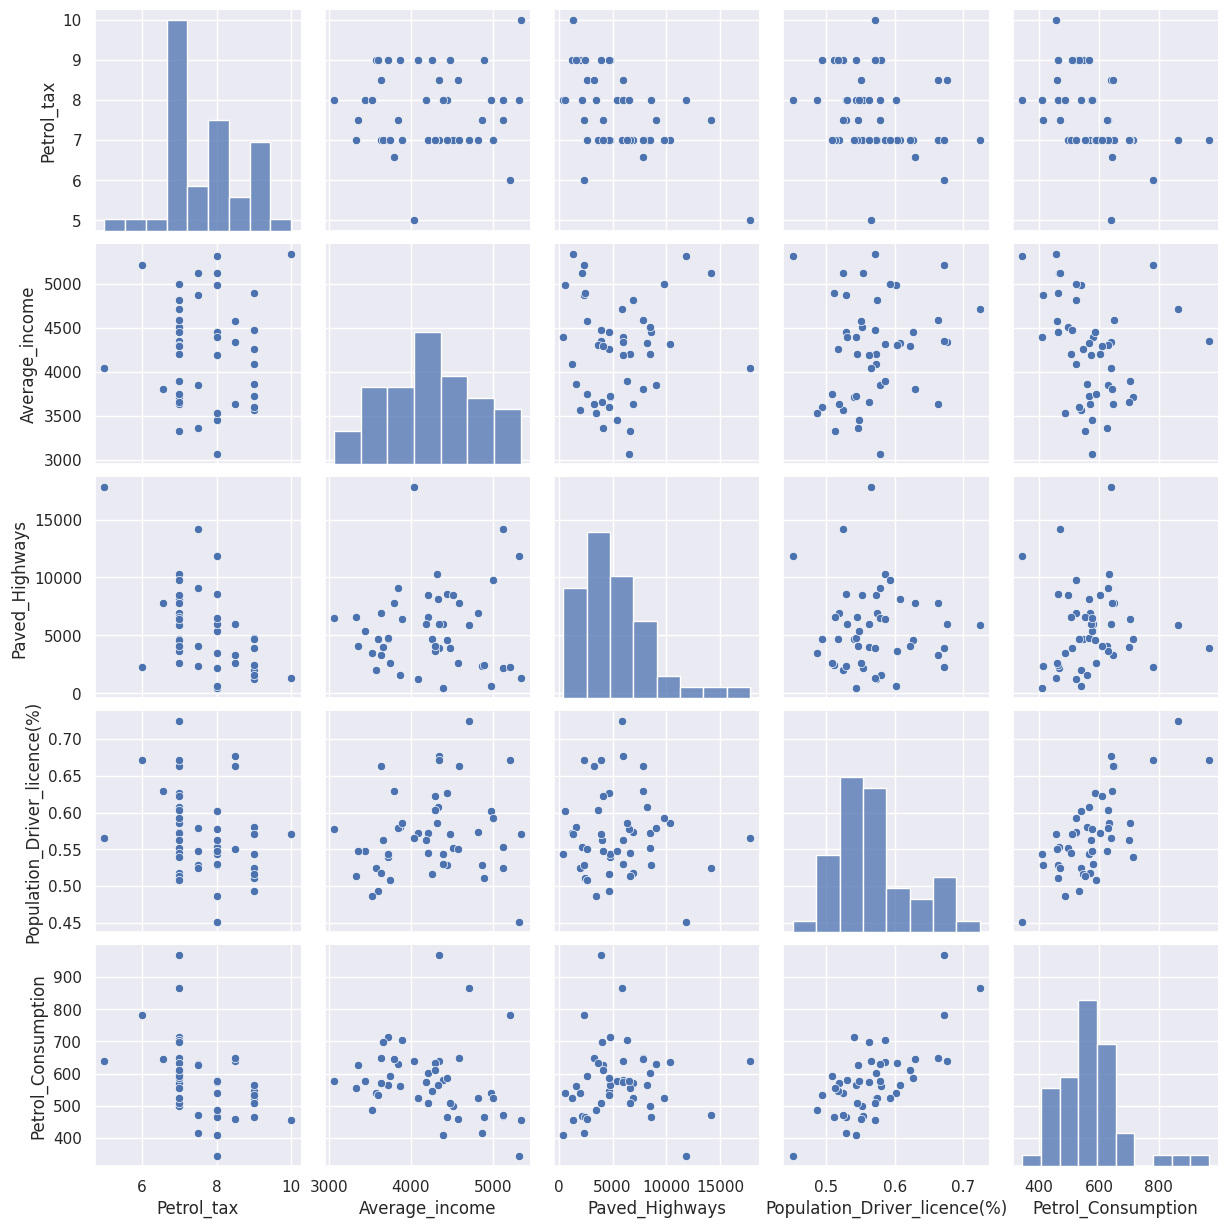


Pearson correlation
                Petrol_tax  Average_income  Paved_Highways  \
Petrol_tax        1.000000        0.012665       -0.522130   
Average_income    0.012665        1.000000        0.050163   

                Population_Driver_licence(%)  Petrol_Consumption  
Petrol_tax                         -0.288037           -0.451280  
Average_income                      0.157070           -0.244862  


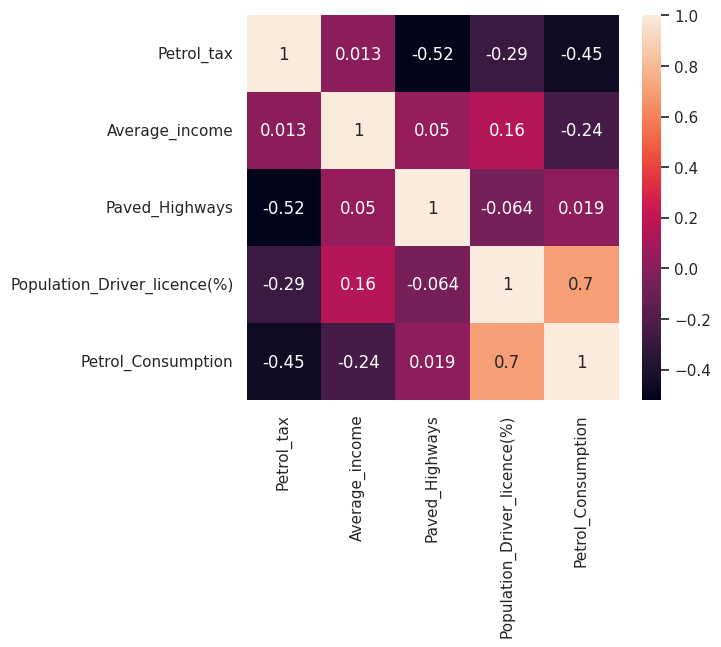

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


preview_window=2
path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/petrol_consumption.csv'

print("\n\n")
print("preview ------------------------" )
df = pd.read_csv(path)
print(df.head(preview_window))

print("")
print("Varie statistiche sul petrolio")
sns.pairplot(df);
plt.show()

print("")
print("Pearson correlation")
corr = df.corr(numeric_only=True) # Default Pearson
print(corr.head(preview_window))
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True);
plt.show()

## Spearman
### When we encounter a quadratic correlation




Random quadratic correlation data ------------------------


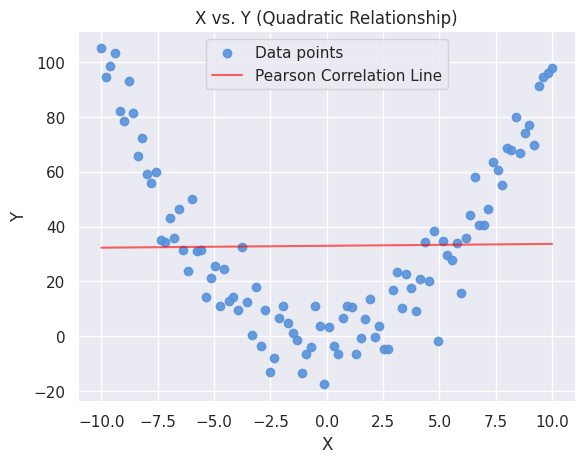


Preview correlazione di spearman
                Petrol_tax  Average_income  Paved_Highways  \
Petrol_tax         1.00000        -0.01841       -0.462443   
Average_income    -0.01841         1.00000       -0.024263   

                Population_Driver_licence(%)  Petrol_Consumption  
Petrol_tax                         -0.348757           -0.530718  
Average_income                      0.206390           -0.355898  

Plot heatmap


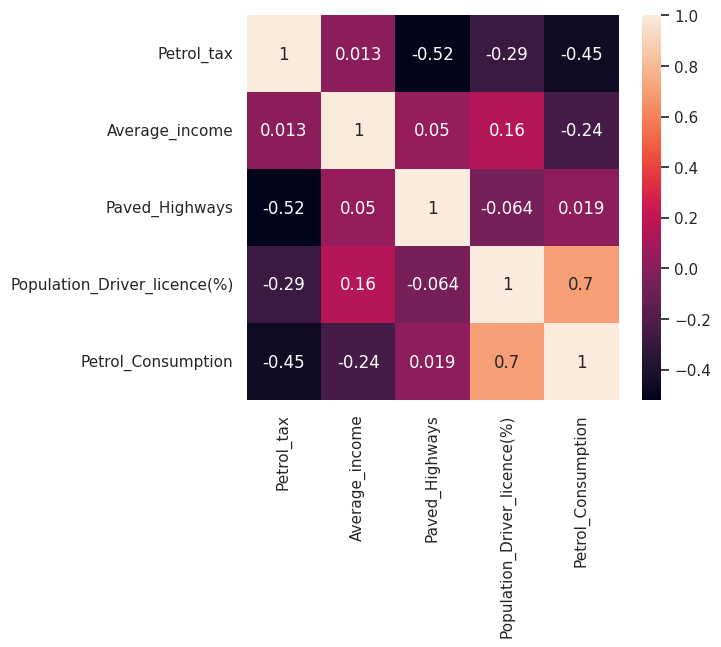

In [10]:
import numpy as np
from scipy.stats import pearsonr

# Generating quadratic data
np.random.seed(42)
X = np.linspace(-10, 10, 100)
Y = X**2 + np.random.normal(0, 10, size=len(X))

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(X, Y)

m, b = np.polyfit(X, Y, 1)  # Fit a linear regression line


print("\n\n")
print("Random quadratic correlation data ------------------------" )

fig, ax = plt.subplots()
ax.scatter(X, Y, color=sns.color_palette("hls",24)[14], alpha=.9, label='Data points')
plt.plot(X, m * X + b, color='red', alpha=.6, label='Pearson Correlation Line')
plt.title("X vs. Y (Quadratic Relationship)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper center')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.show()


print("")
print("Preview correlazione di spearman")
corr_spearman = df.corr(numeric_only=True,method='spearman')
print(corr_spearman.head(preview_window))


print("")
print("Plot heatmap")
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True);
plt.show()


### When we encounter polinomial correlation

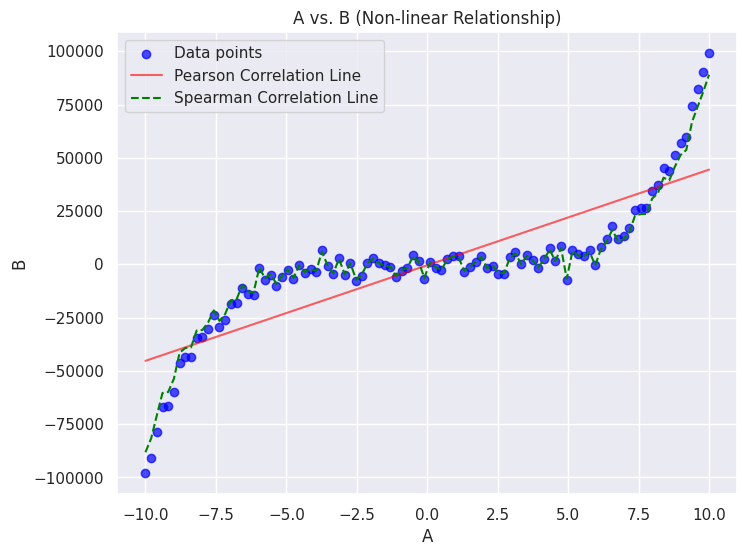

In [11]:
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Generating non-linear data
np.random.seed(42)
A = np.linspace(-10, 10, 100)
B = A**5 + np.random.normal(0, 4000, size=len(A))

# Calculate Spearman correlation coefficient
spearman_corr, _ = spearmanr(A, B)

# Fit a linear regression line for Pearson correlation
m, b = np.polyfit(A, B, 1)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(A, B, color='blue', alpha=0.7, label='Data points')
plt.plot(A, m * A + b, color='red', alpha=0.6, label='Pearson Correlation Line')
plt.title("A vs. B (Non-linear Relationship)")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()

# Calculate and plot Spearman correlation line
sorted_indices = np.argsort(A)
sorted_A = A[sorted_indices]
sorted_B = B[sorted_indices]
plt.plot(sorted_A, spearman_corr * sorted_B + (1 - spearman_corr) * np.mean(sorted_B), color='green', linestyle='--', label='Spearman Correlation Line')
plt.legend()

plt.grid(True)
plt.show()


# Correlation Matrix with Categorical Variables

In [12]:
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

preview_window=2

url="https://raw.githubusercontent.com/adamerose/datasets/master/pokemon.csv"
df= pd.read_csv(url)
print("\n\n")
print("Preview ------------------------")
print(df.head(preview_window))

print("")
print("Find class features")
categorical_features=identify_nominal_columns(df)
print(categorical_features) # is a list of fields




Preview ------------------------
   #       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  

Find class features
['Name', 'Type 1', 'Type 2']


associations function returns a dictionary that contains:
- ‘corr’ as key : A DataFrame of the correlation between all features.
- ‘ax’ as value: A matplotlib axe which contains the correlation heatmap.

Firstly, Let’s find the correlation matrix for the whole pokemon dataset.




Correlation ------------------------


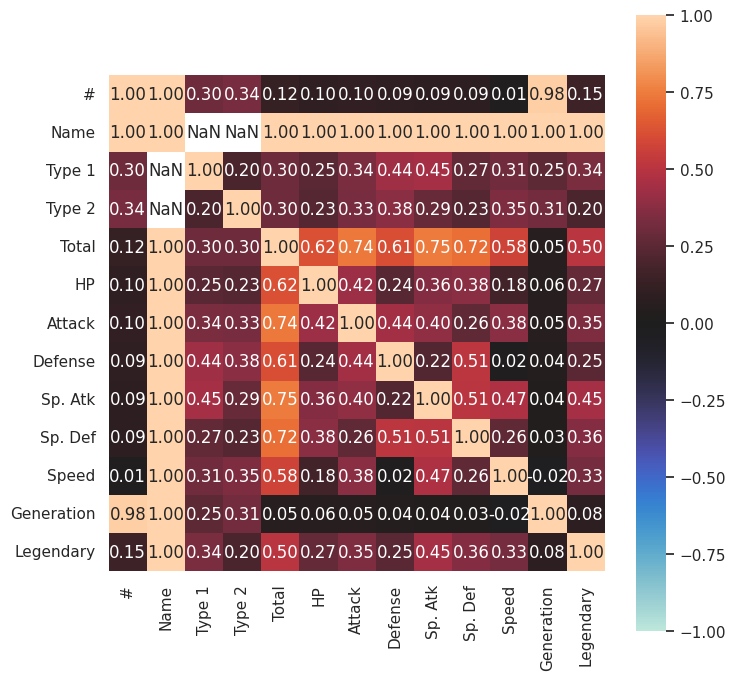




Complete Correlation (drop NanN) ------------------------


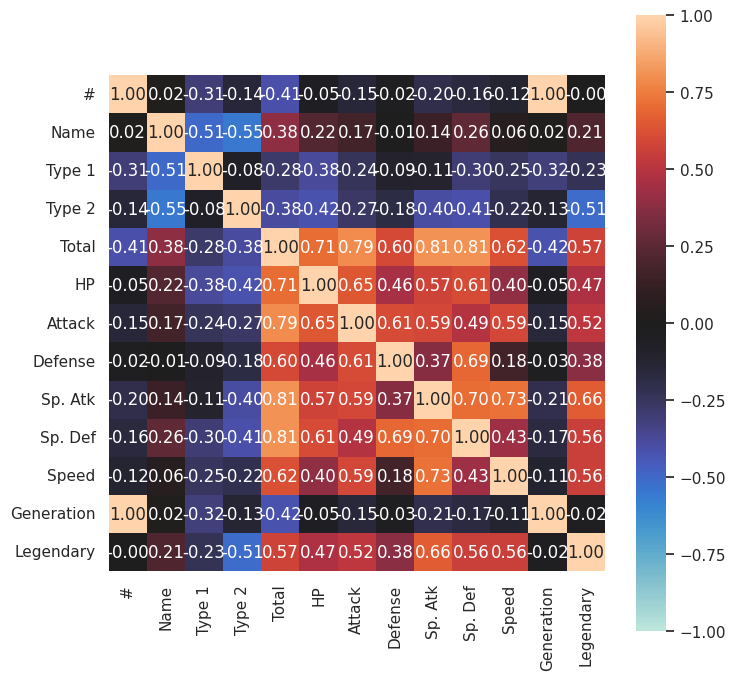




Correlation Matrix of Categorical Variables Only (categorical features) ------------------------
        Name Type 1  Type 2
0  Bulbasaur  Grass  Poison
1    Ivysaur  Grass  Poison


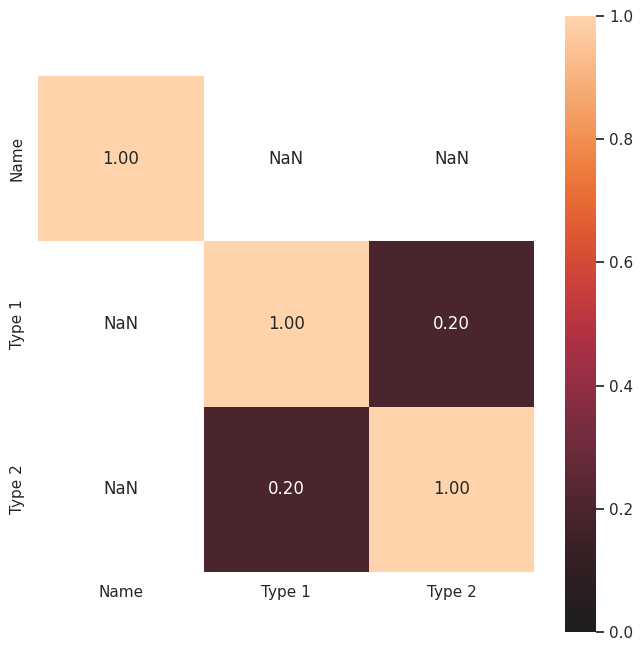

In [13]:
print("\n\n")
print("Correlation ------------------------")
#complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(5,5))
complete_correlation= associations(df,  figsize=(8,8)) # without saving plot
plt.show()


print("\n\n")
print("Complete Correlation (drop NanN) ------------------------")
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, 
                            how='all').style.background_gradient(cmap='coolwarm', 
                            axis=None) #.set_precision(2)
complete_correlation= associations(df_complete_corr,  figsize=(8,8))
plt.show()


print("\n\n")
print("Correlation Matrix of Categorical Variables Only (categorical features) ------------------------")
selected_column= df[categorical_features]
categorical_df = selected_column.copy()
print(categorical_df.head(preview_window))
#categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))
categorical_correlation= associations(categorical_df,  figsize=(8,8))
plt.show()